---
# Project on the Topic "Cancer Classification"
### From Radi Atanasov
---

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

## Description of the data

This dataset, named "Cancer_Data.csv", includes 570 observations of cancer cells with 30 features for those cells. Each observation is labeled as either benign or malignant, with benign cells labeled "B" and malignant cells labeled "M".(https://www.kaggle.com/datasets/erdemtaha/cancer-data?select=Cancer_Data.csv)

In [28]:
data=pd.read_csv(os.getcwd()+'\\Cancer_Data.csv')

In [29]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [30]:
print(data.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


## The set includes 570 cells, and for each of them the following data is stored:
<ul>
<li>id - unique identifier for each patient in the database</li>
<li>diagnosis - whether the cancer cell is benign (B) or malignant (M)</li>
<li>radius_mean - mean cell radius</li>
<li>texture_mean - average cell texture</li>
<li>perimeter_mean - average cell perimeter</li>
<li>area_mean - average cell area</li>
<li>smoothness_mean - average cell smoothness</li>
<li>compactness_mean - average cell compactness</li>
<li>concavity_mean - median cell concavity</li>
<li>concave points_mean - the average number of concave points of the cell</li>
<li>symmetry_mean -  mean cell symmetry</li>
<li>fractal_dimension_mean - average fractal dimension of the cell</li>
<li>radius_se - the standard deviation of the cell radius</li>
<li>texture_se - the standard deviation of the cell texture</li>
<li>perimeter_se - the standard deviation of the cell perimeter</li>
<li>area_se - the standard deviation of the cell area</li>
<li>smoothness_se - the standard deviation of cell smoothness</li>
<li>compactness_se - the standard deviation of cell compactness</li>
<li>concavity_se - the standard deviation of the concavity of the cell</li>
<li>concave points_se - the standard deviation of the number of indented points of the cell</li>
<li>symmetry_se - the standard deviation of cell symmetry</li>
<li>fractal_dimension_se - the standard deviation of cell symmetry</li>
<li>radius_worst - the largest dimension of the cell radius</li>
<li>texture_worst - the largest dimension of the cell texture</li>
<li>perimeter_worst - the largest dimension of the cell perimeter</li>
<li>area_worst - the largest dimension of the cell area</li>
<li>smoothness_worst - the greatest smoothness of the cell</li>
<li>compactness_worst - the greatest compactness of the cell</li>
<li>concavity_worst - the greatest concavity of the cell</li>
<li>concave points_worst - points of greatest concavity</li>
<li>symmetry_worst - the degree of symmetry of the cancer cell</li>
<li>fractal_dimension_worst - The fractal dimension of the cell</li>
</ul>

#### Structure of the data set


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#### Descriptive statistics for the number columns

In [32]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


#### Descriptive statistics for text columns

In [33]:
data.describe(include='object')

,diagnosis
count,569
unique,2
top,B
freq,357


# Missing values

In [34]:
check_na = pd.DataFrame({'Missing values count': pd.isnull(data).sum(),
                         'Missing values %': pd.isnull(data).sum() / data.shape[0]}).style.format({'Missing values %': '{:.2%}'})

In [35]:
check_na

,Missing values count,Missing values %
id,0,0.00%
diagnosis,0,0.00%
radius_mean,0,0.00%
texture_mean,0,0.00%
perimeter_mean,0,0.00%
area_mean,0,0.00%
smoothness_mean,0,0.00%
compactness_mean,0,0.00%
concavity_mean,0,0.00%
concave points_mean,0,0.00%


<AxesSubplot: >

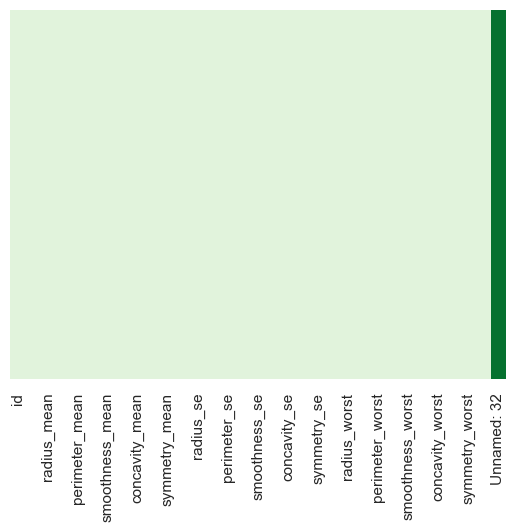

In [36]:
sns.heatmap(data.isnull(),yticklabels=False, cbar=False,cmap=sns.color_palette('Greens'))

#### There are no missing values in this database. The column "Unnamed: 32" is unnecessary for the analysis because it does not contain any information. The remaining columns can be useful for analysis and modeling.

In [37]:
data['Unnamed: 32']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
564   NaN
565   NaN
566   NaN
567   NaN
568   NaN
Name: Unnamed: 32, Length: 569, dtype: float64

In [38]:
data.drop(columns='Unnamed: 32', inplace=True)

In [39]:
pd.DataFrame(data.columns)

,0
0,id
1,diagnosis
2,radius_mean
3,texture_mean
4,perimeter_mean
5,area_mean
6,smoothness_mean
7,compactness_mean
8,concavity_mean
9,concave points_mean


# Preliminary data analysis

In [40]:
sns.set_theme(style='darkgrid', palette='deep')

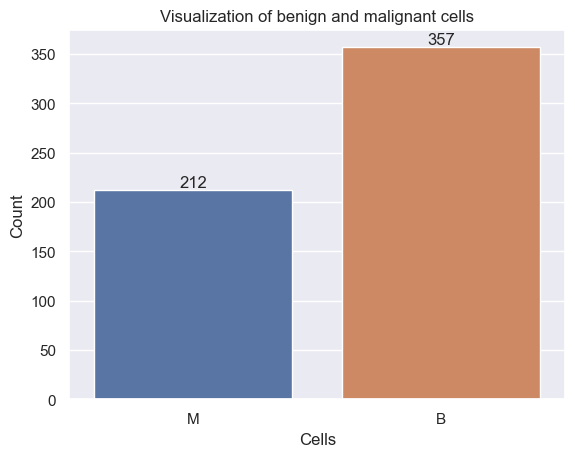

In [41]:
g=sns.countplot(data=data, x='diagnosis')
for i in g.containers:
 plt.bar_label(i)
g.set(title='Visualization of benign and malignant cells')
plt.xlabel('Cells')
plt.ylabel('Count')
plt.show()

#### Checking for correlation between variables

<AxesSubplot: >

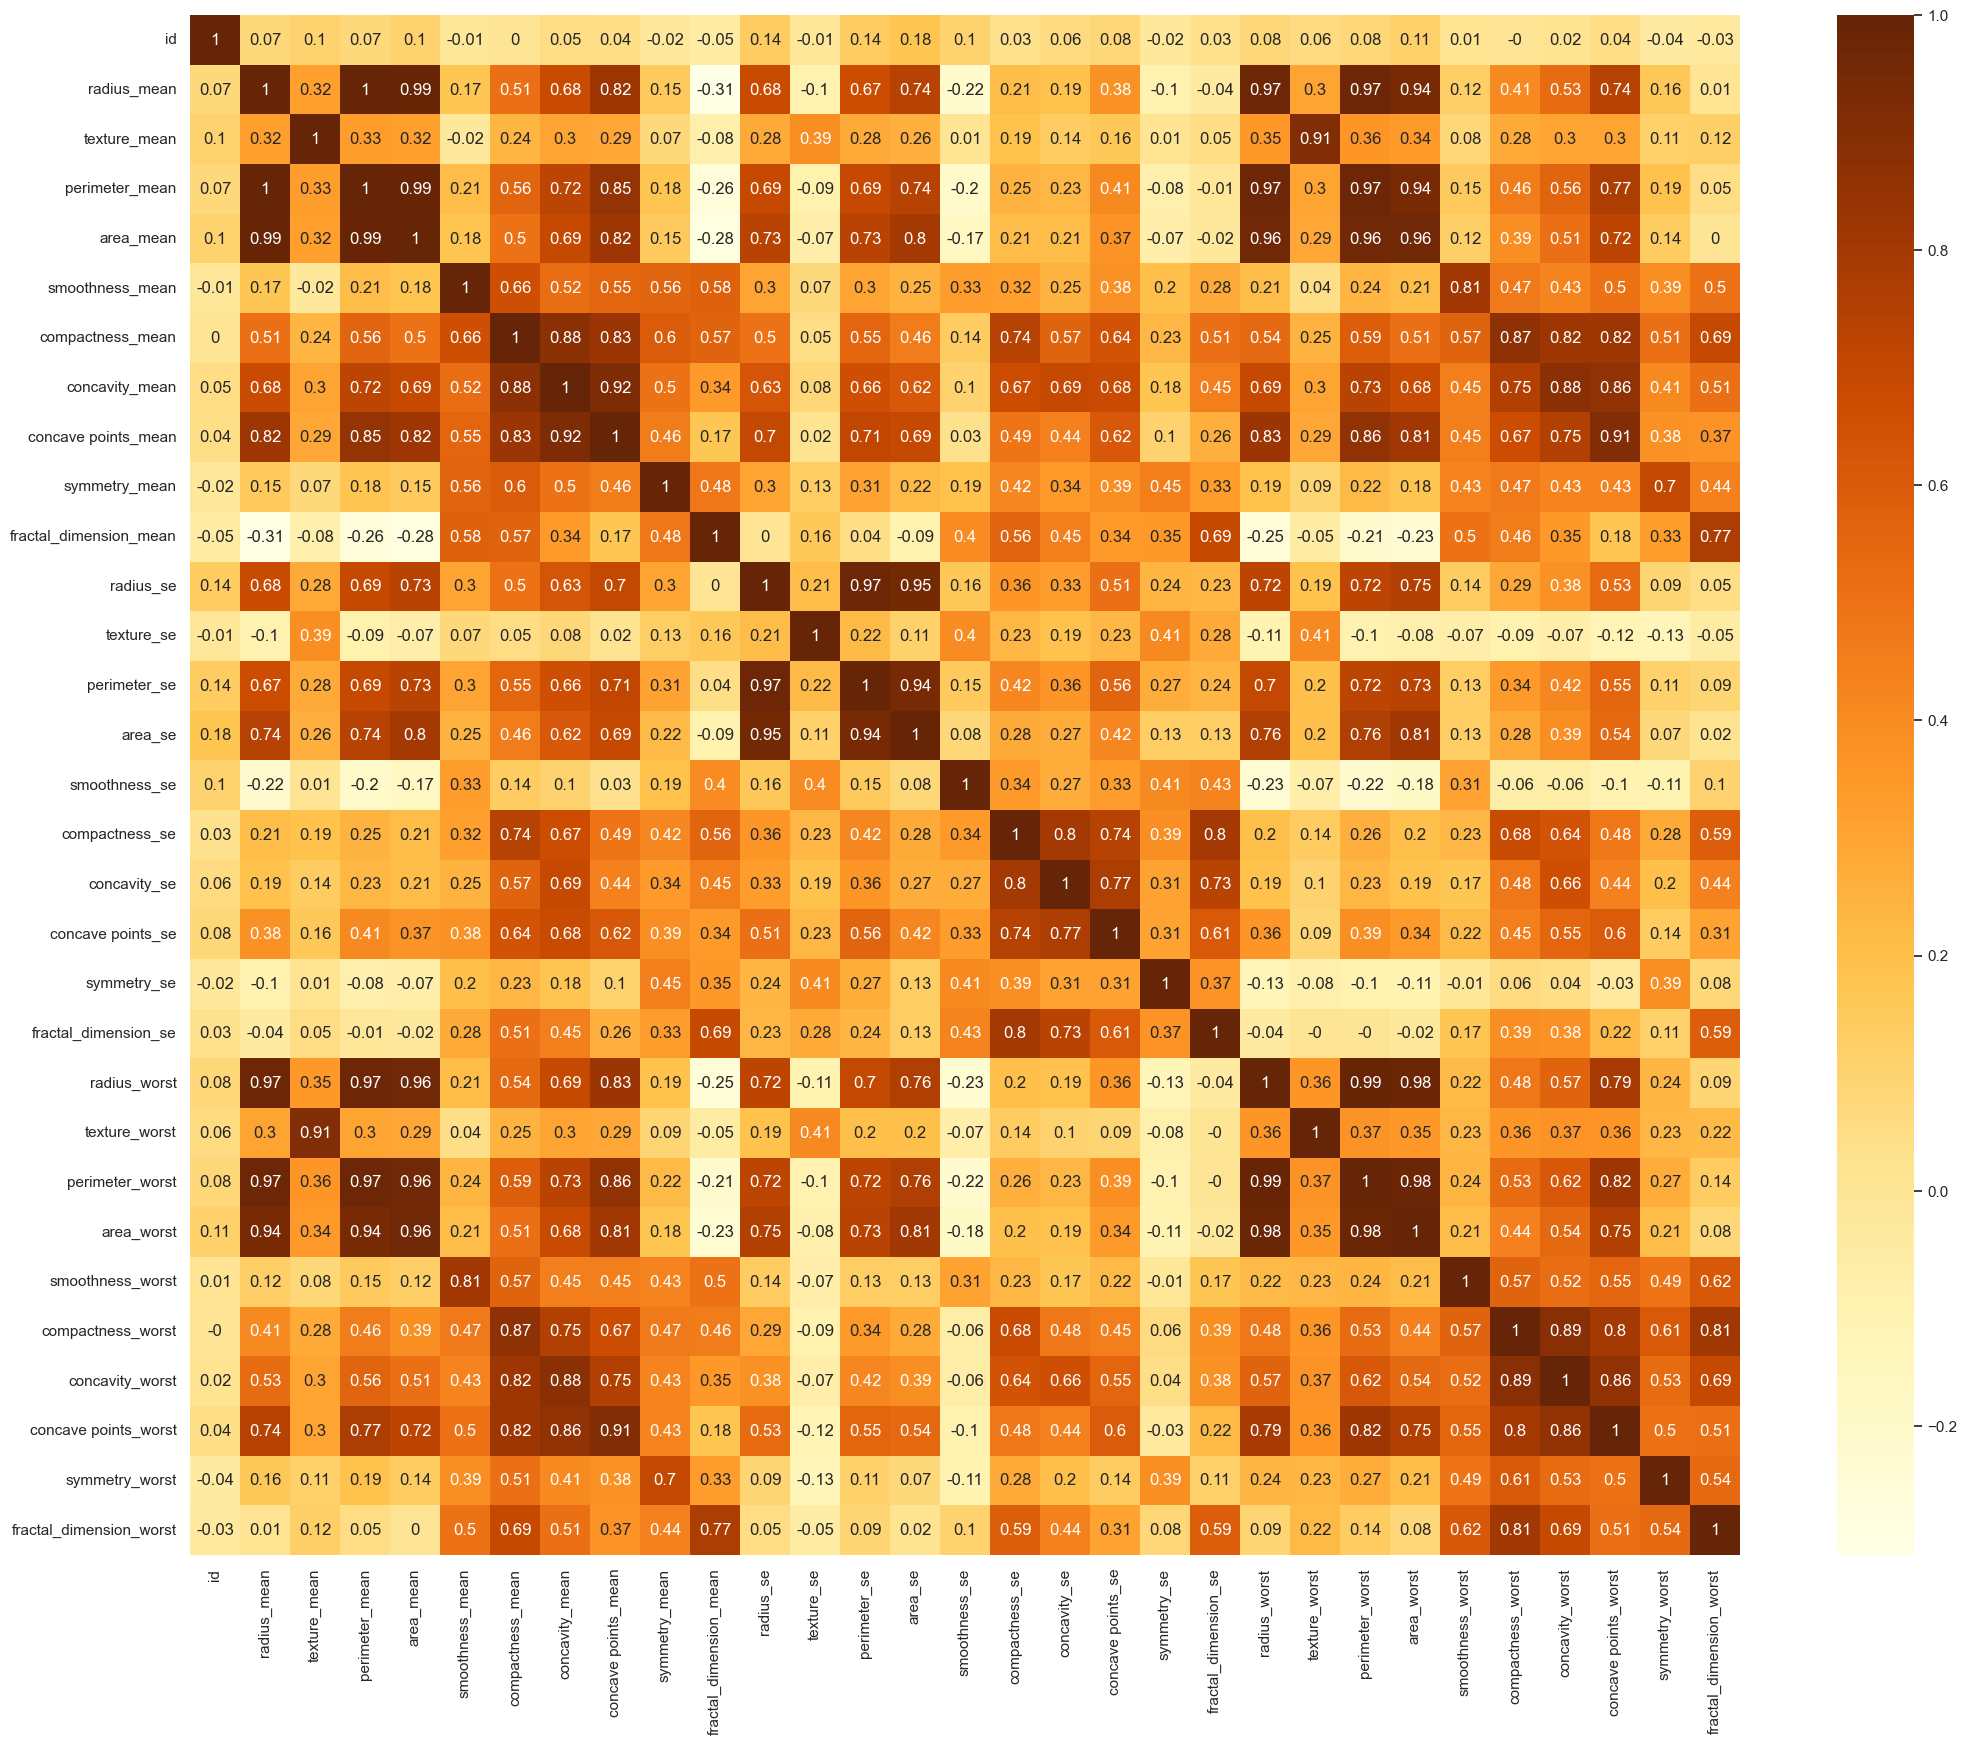

In [42]:
corr = data.corr().round(2)
plt.figure(figsize = (25,20))
sns.heatmap(corr, annot = True, cmap = 'YlOrBr')

### Plotting our continuous variables and checking that our data is already normalized

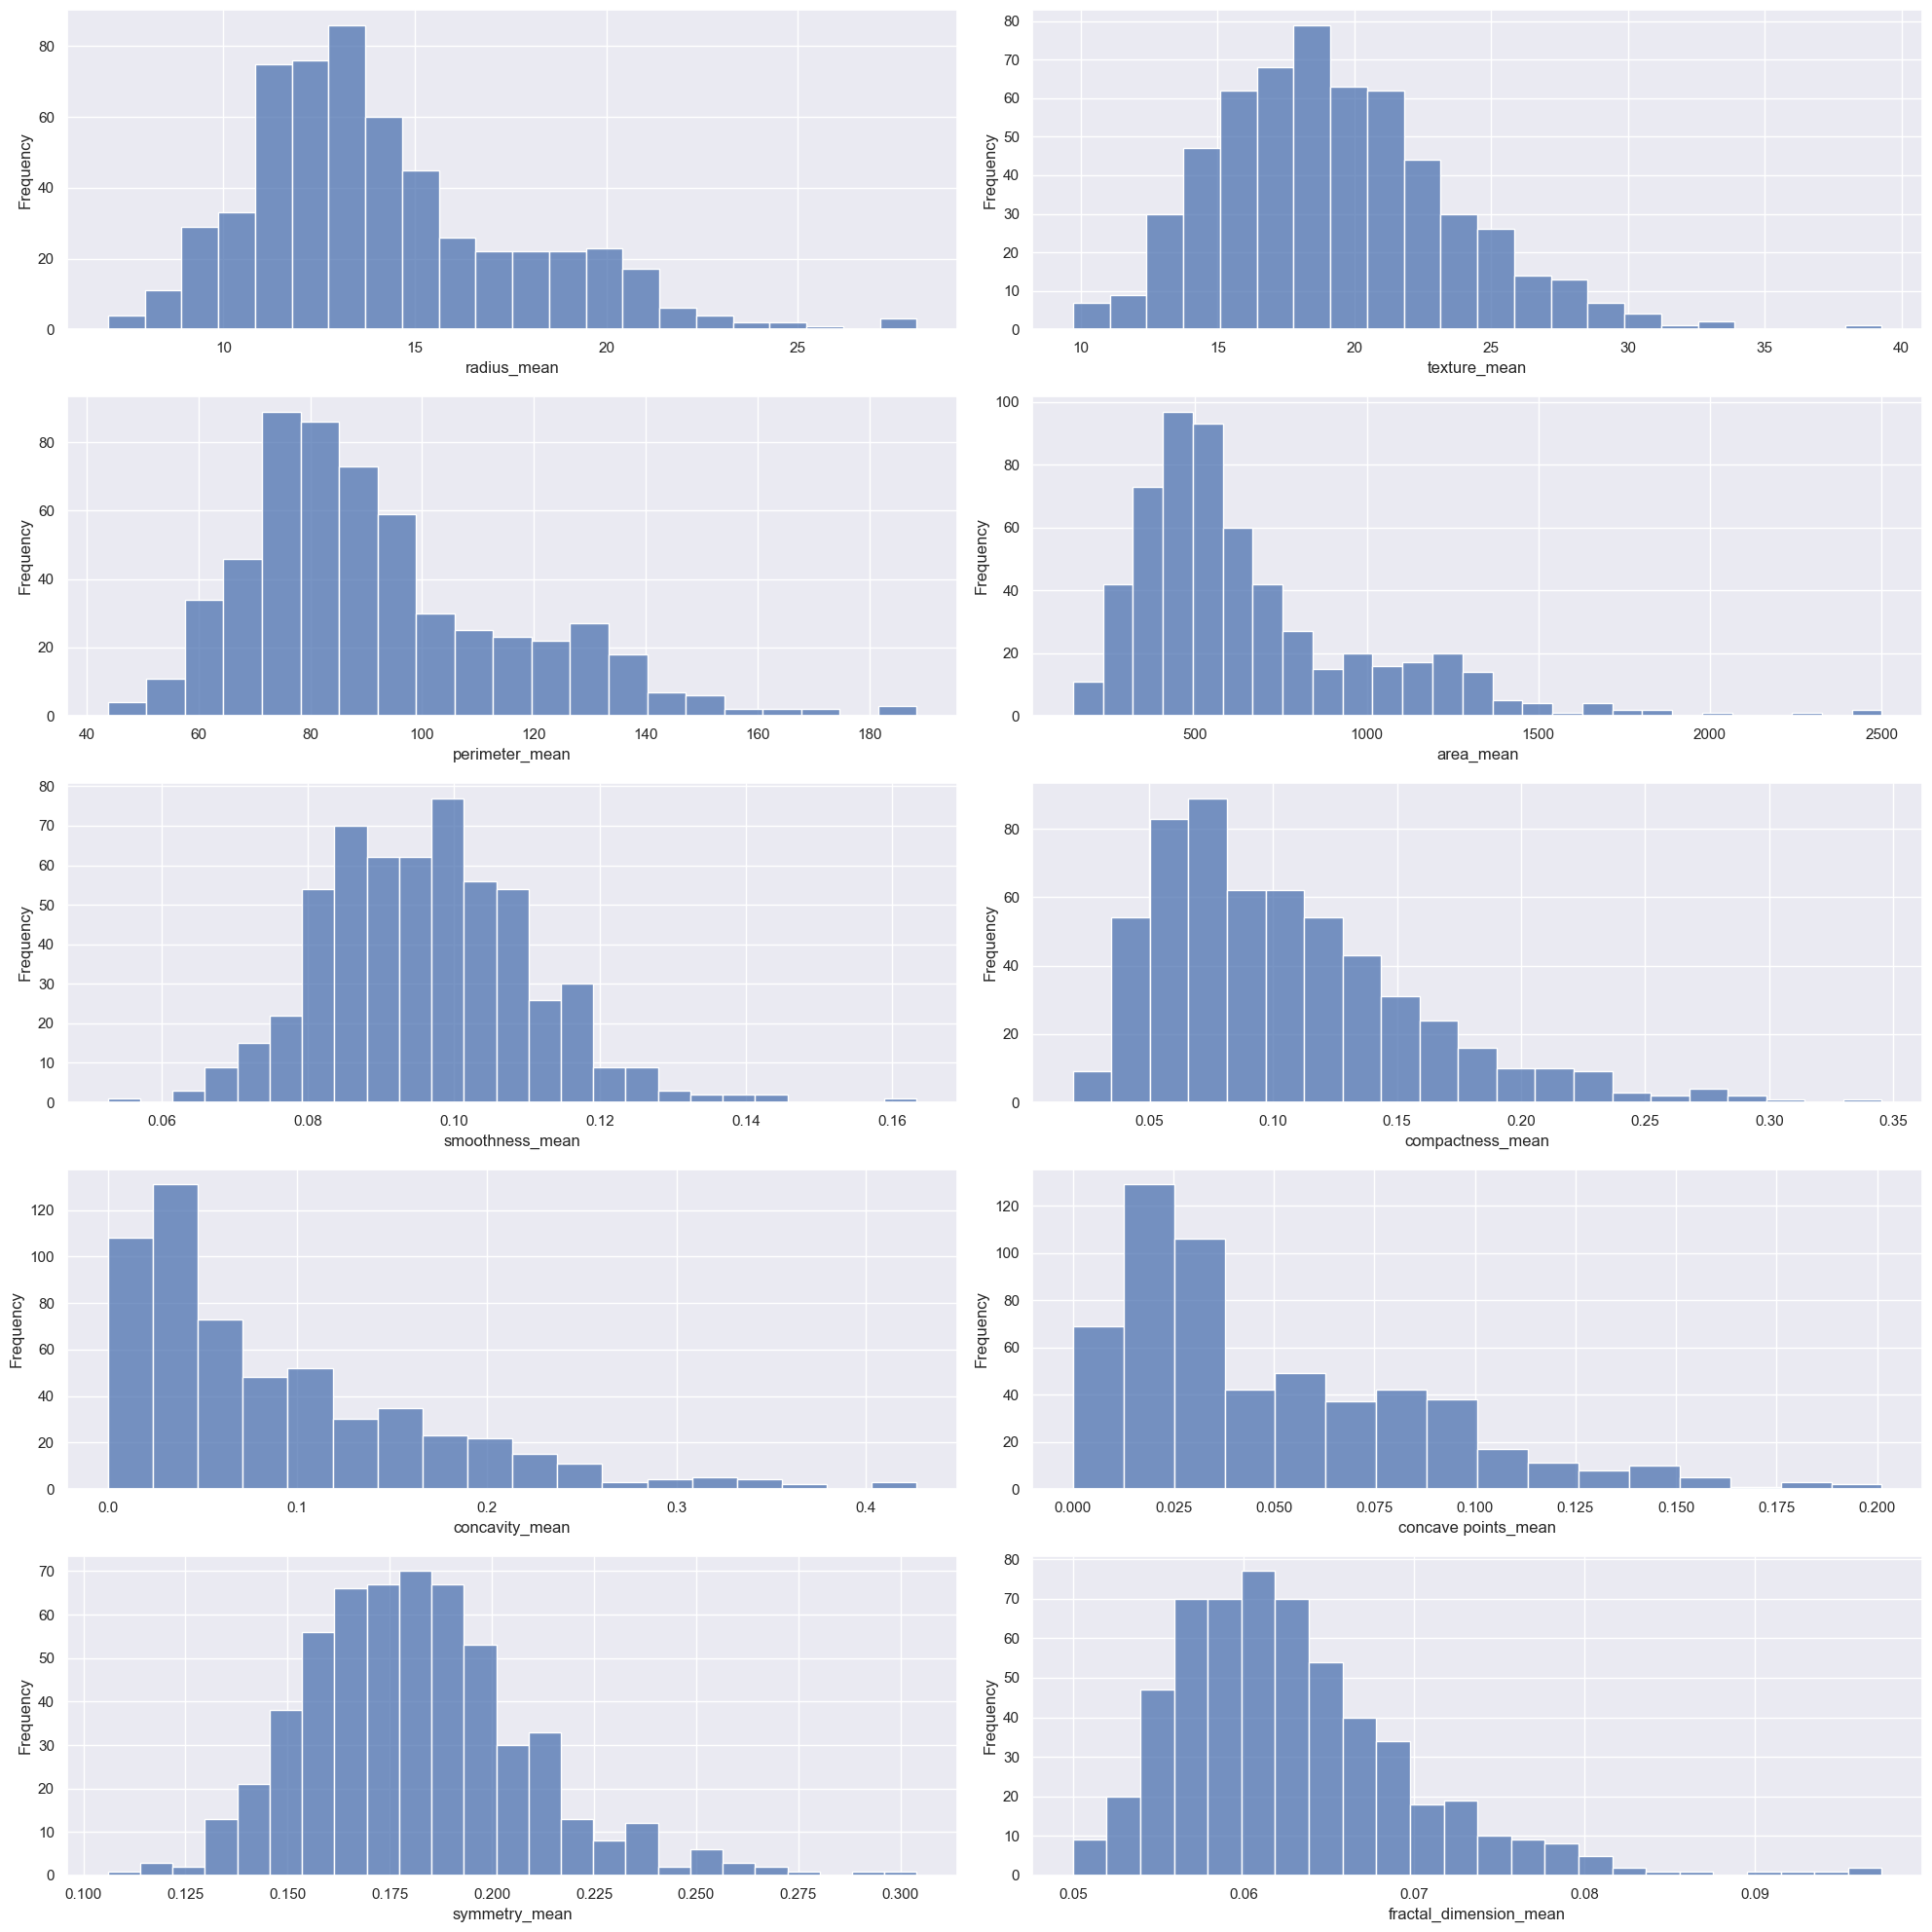

In [43]:
plt.figure(figsize=(20,20))

for i in range(10):
    plt.subplot(5,2,i+1)
    sns.histplot(x=data[data.columns[i+2]], kde=False)
    plt.xlabel(data.columns[i+2])
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In the analysis of our variables can explain the result well, we can see that in most of the variables, the higher the values, the higher the chance that the **Cancer** result is malignant.

<AxesSubplot: xlabel='diagnosis', ylabel='fractal_dimension_mean'>

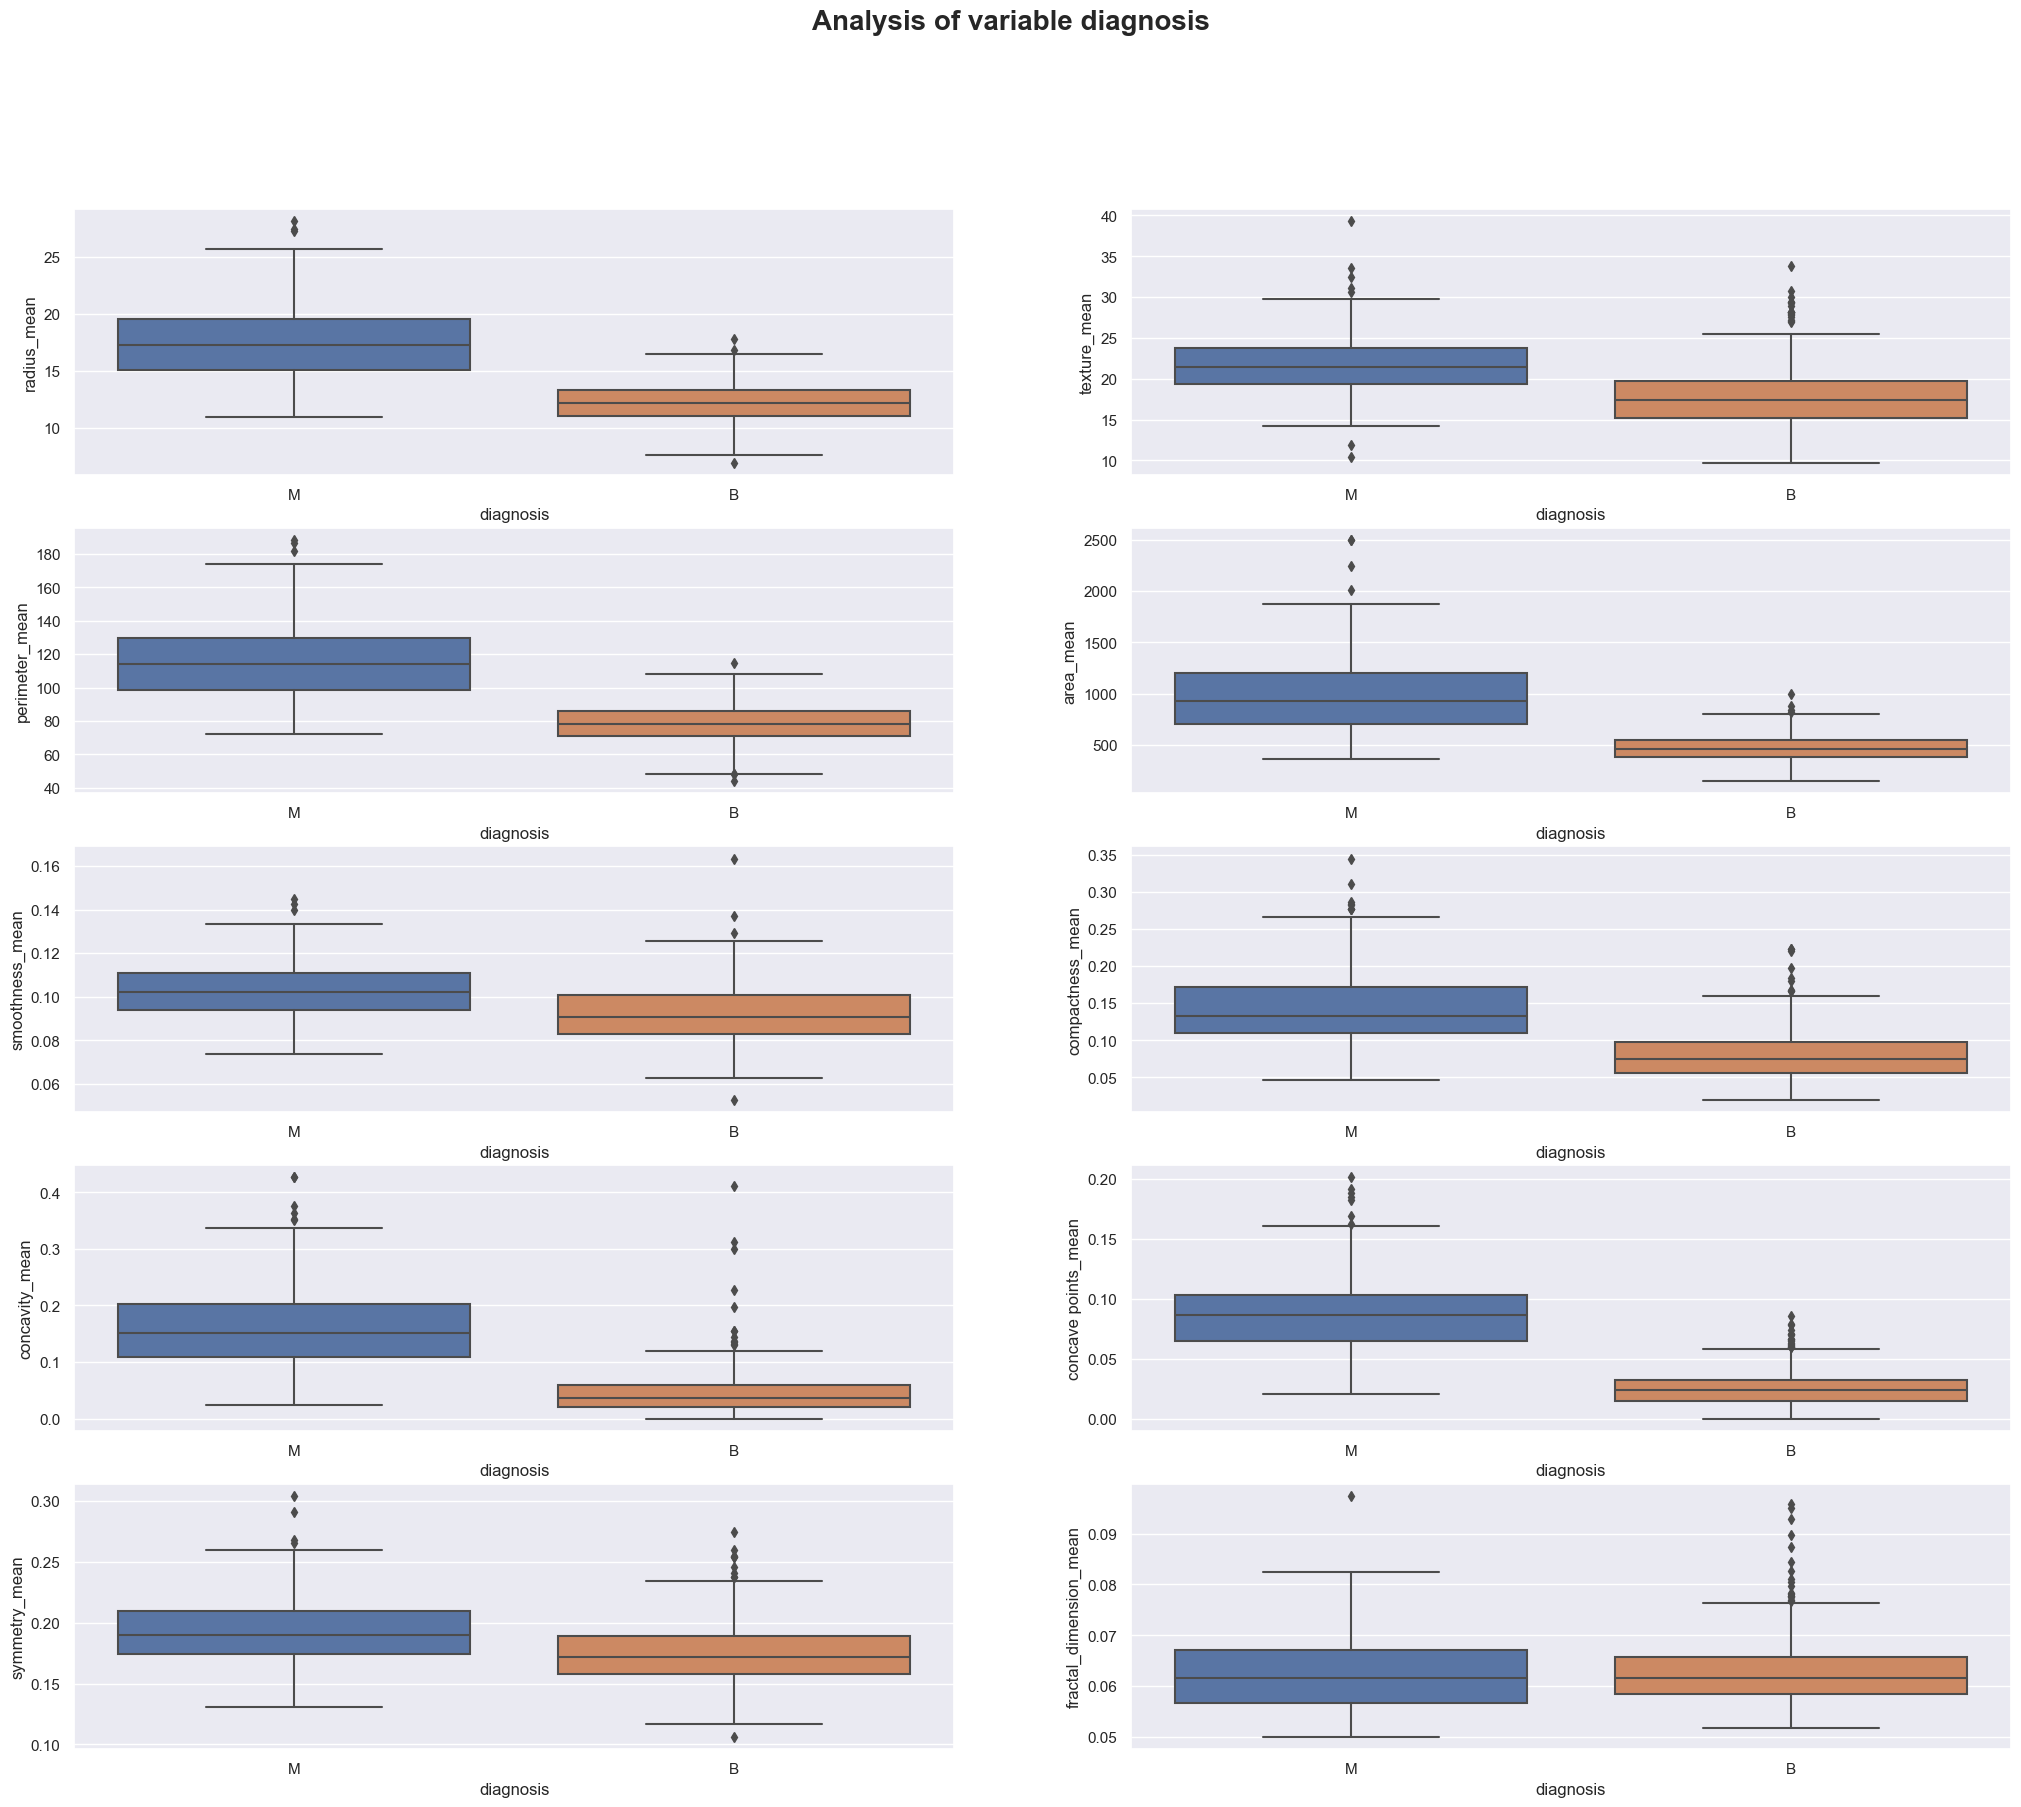

In [44]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis of variable diagnosis",fontweight="bold", fontsize=20)

plt.subplot(5,2,1)
sns.boxplot(x="diagnosis", y="radius_mean", data=data)

plt.subplot(5,2,2)
sns.boxplot(x="diagnosis", y="texture_mean", data=data)

plt.subplot(5,2,3)
sns.boxplot(x="diagnosis", y="perimeter_mean", data=data)

plt.subplot(5,2,4)
sns.boxplot(x="diagnosis", y="area_mean", data=data)

plt.subplot(5,2,5)
sns.boxplot(x="diagnosis", y="smoothness_mean", data=data)

plt.subplot(5,2,6)
sns.boxplot(x="diagnosis", y="compactness_mean", data=data)

plt.subplot(5,2,7)
sns.boxplot(x="diagnosis", y="concavity_mean", data=data)

plt.subplot(5,2,8)
sns.boxplot(x="diagnosis", y="concave points_mean", data=data)

plt.subplot(5,2,9)
sns.boxplot(x="diagnosis", y="symmetry_mean", data=data)

plt.subplot(5,2,10)
sns.boxplot(x="diagnosis", y="fractal_dimension_mean", data=data)

# Preparing the data for training the models

#### To prepare the data from the Cancer_Data database, the following steps will need to be performed:
Remove the **diagnosis** column: This column contains the target variable we will use to train the model, so we need to separate it into a separate variable. We can detach it by saving it to a new variable and removing it from the original **DataFrame**:

In [45]:
X = data.drop(columns="diagnosis")
y = data["diagnosis"]

In [46]:
X.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [47]:
pd.DataFrame(y)

,diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


#### Convert categorical data to numeric: If there is categorical data in the database, we will need to convert it to numeric so that we can use it to train the model.

In [48]:
y = y.replace({"M": 1, "B": 0})
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

#### We split the set into training and test set in the ratio 80:20

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

The **StandardScaler** class from the **sklearn.preprocessing** library is used to standardize (normalize) the data in **X_train** and **X_test**. Standardization is necessary to ensure that all features have the same scale.

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [52]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,-0.174470,1.403811,1.792834,1.379601,1.342225,0.330349,0.705630,1.229423,1.176285,0.260292,...,1.496821,1.733735,1.512809,1.421610,1.965576,0.765781,1.399530,1.044121,0.522960,0.649908
1,-0.241765,1.165655,-0.144612,1.071214,1.071068,-0.820808,-0.412695,-0.119237,0.202709,-0.726151,...,1.008308,0.140997,0.913198,0.886000,-0.469582,-0.105030,0.349682,0.594078,0.441538,-0.852815
2,-0.241472,-0.030728,-0.772711,-0.098222,-0.130408,-0.913644,-0.887366,-0.685403,-0.523048,-0.399677,...,-0.136960,-0.657041,-0.192879,-0.239804,-0.642887,-0.849211,-0.797285,-0.640476,-0.311617,-0.692928
3,-0.241586,0.591279,0.652592,0.620807,0.472287,1.365820,0.392012,1.080400,0.750693,0.144446,...,0.282634,-0.051000,0.170962,0.144334,0.383612,-0.310257,0.257773,-0.189386,-0.294393,-0.304554
4,-0.241733,0.949914,0.034155,0.929193,0.821157,-0.549444,0.235203,0.148394,0.626025,-1.129855,...,0.827903,0.054181,0.921931,0.594315,0.183645,0.503165,0.335470,1.144297,0.006243,-0.351007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,-0.241447,-0.557472,-0.277479,-0.564454,-0.566216,-0.464464,-0.528919,-0.760891,-0.881374,-1.277295,...,-0.607229,0.393097,-0.552936,-0.585392,-0.585119,-0.208579,-0.558985,-0.904072,-0.811110,-0.425549
451,-0.241494,-0.711573,-0.763048,-0.679288,-0.697881,0.815949,0.179858,-0.250182,-0.130330,0.204124,...,-0.749121,-0.975923,-0.753777,-0.707695,0.334731,-0.276572,-0.235882,-0.102667,-0.214537,-0.588677
452,-0.241841,1.064789,0.200843,0.892674,0.906138,-0.953634,-0.734800,-0.226240,0.147582,1.057169,...,0.860335,0.386419,0.622125,0.631842,-1.189464,-0.880400,-0.260992,0.016946,3.065836,-1.299527
453,0.493108,1.513082,2.317056,1.679872,1.535110,-0.340921,1.830965,1.062078,1.625394,0.228698,...,1.766415,1.795507,2.060026,1.766175,-0.260727,1.693980,0.687472,1.147287,-0.165997,0.828160


In [53]:
pd.DataFrame(y_train.head())

,diagnosis
280,1
186,1
437,0
329,1
201,1


In [54]:
y_train.value_counts()/y_train.count()

0    0.621978
1    0.378022
Name: diagnosis, dtype: float64

# Training the models

## Logistic Regression Default model

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,RocCurveDisplay,roc_auc_score

In [56]:
log_model=LogisticRegression(max_iter = 15000)
log_model.fit(X_train, y_train) 

LogisticRegression(max_iter=15000)

In [57]:
print(classification_report(y_test,log_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97        74
           1       0.93      0.95      0.94        40

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [58]:
print(classification_report(y_train,log_model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       283
           1       0.99      0.98      0.99       172

    accuracy                           0.99       455
   macro avg       0.99      0.99      0.99       455
weighted avg       0.99      0.99      0.99       455



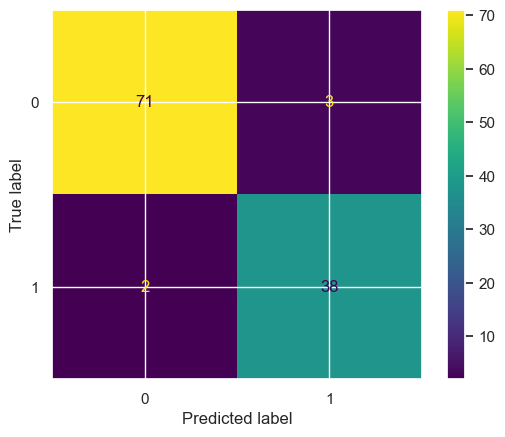

In [59]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,log_model.predict(X_test))).plot()

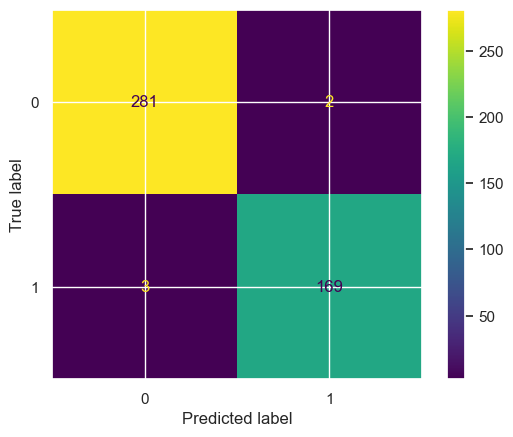

In [60]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train,log_model.predict(X_train))).plot()

## Logistic Regression Tuned model

In [61]:
log_modelTN= LogisticRegression(penalty = 'l2' , solver = 'lbfgs' , C = 10 , tol = 0.2,max_iter = 500)
log_modelTN.fit(X_train,y_train)

LogisticRegression(C=10, max_iter=500, tol=0.2)

In [62]:
print(classification_report(y_test,log_modelTN.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        74
           1       0.95      0.93      0.94        40

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



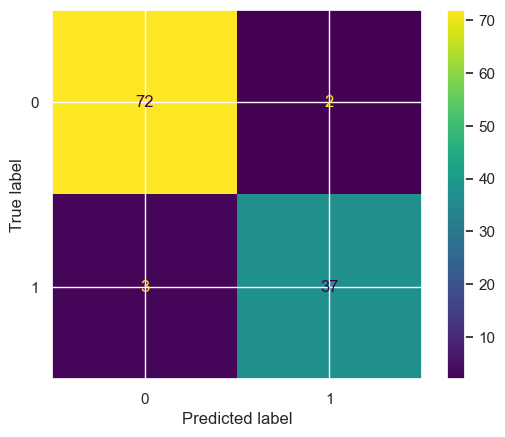

In [63]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,log_modelTN.predict(X_test))).plot()

## Decision Tree Default Model

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
dt1_model= DecisionTreeClassifier()
dt1_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [66]:
print(classification_report(y_test,dt1_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.91      0.94        74
           1       0.85      0.97      0.91        40

    accuracy                           0.93       114
   macro avg       0.92      0.94      0.93       114
weighted avg       0.94      0.93      0.93       114



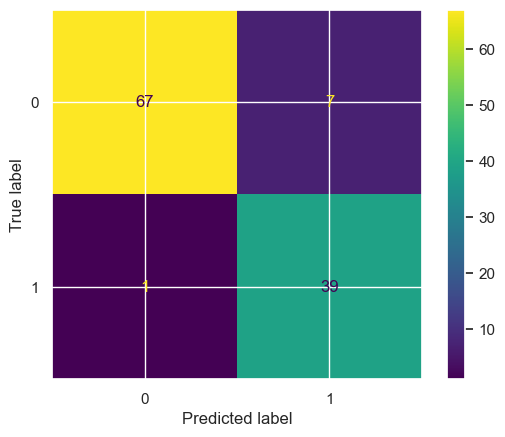

In [67]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,dt1_model.predict(X_test))).plot()

## Desicion Tree Tuned Model

In [68]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [69]:
params={'max_depth':[3,5,7,10],
 'min_samples_leaf':[3,5,10,15],
 'ccp_alpha':[0,0.005,0.01]} 

In [70]:
dt2_model=DecisionTreeClassifier()

In [71]:
dt2_model=GridSearchCV(dt2_model,params,cv=5,scoring='recall')

In [72]:
dt2_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0, 0.005, 0.01],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [3, 5, 10, 15]},
             scoring='recall')

In [73]:
dt2_model.best_params_

{'ccp_alpha': 0, 'max_depth': 3, 'min_samples_leaf': 15}

In [74]:
print(classification_report(y_test,dt2_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96        74
           1       0.89      0.97      0.93        40

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



## Random Forest Default Model

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
rf1=RandomForestClassifier()
rf1.fit(X_train,y_train)

RandomForestClassifier()

In [77]:
print(classification_report(y_test,rf1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96        74
           1       0.89      0.97      0.93        40

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



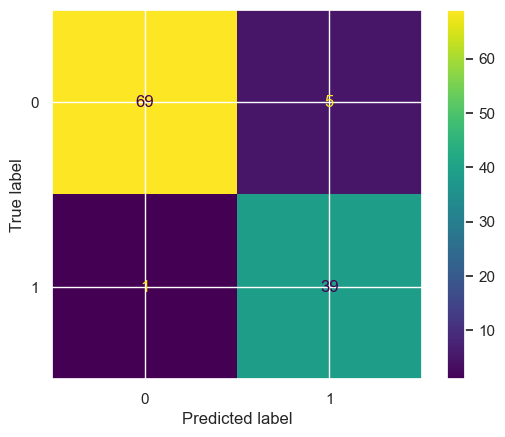

In [78]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,rf1.predict(X_test))).plot()

## Random Forest Tuned Model

In [79]:
params={'max_depth':[3,5,7,10],
 'min_samples_leaf':[3,5,10,15],
 'max_samples':[0.3,0.5,0.7,1.0],
 'n_estimators':[25,50,100,500]}


In [80]:
rf2_model=RandomForestClassifier()

In [81]:
rf2=RandomizedSearchCV(rf2_model, param_distributions=params, n_iter=100, cv=5, random_state=42)

In [82]:
rf2.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': [3, 5, 7, 10],
                                        'max_samples': [0.3, 0.5, 0.7, 1.0],
                                        'min_samples_leaf': [3, 5, 10, 15],
                                        'n_estimators': [25, 50, 100, 500]},
                   random_state=42)

In [83]:
rf2.best_params_

{'n_estimators': 100,
 'min_samples_leaf': 3,
 'max_samples': 1.0,
 'max_depth': 7}

In [84]:
print(classification_report(y_test,rf2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97        74
           1       0.91      0.97      0.94        40

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



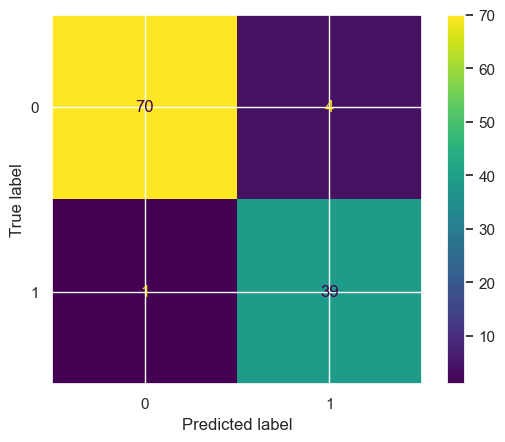

In [85]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,rf2.predict(X_test))).plot()

## Multi-layer Perceptron classifier

In [86]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(activation = 'logistic' , hidden_layer_sizes = 5 , solver = 'lbfgs'  , alpha= 0.1,random_state = 44,max_iter = 1000)
mlp_model.fit(X_train,y_train)

MLPClassifier(activation='logistic', alpha=0.1, hidden_layer_sizes=5,
              max_iter=1000, random_state=44, solver='lbfgs')

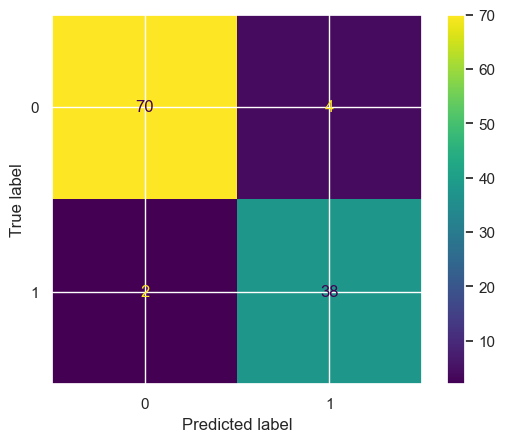

In [87]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,mlp_model.predict(X_test))).plot()

In [88]:
print(classification_report(y_test,mlp_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        74
           1       0.90      0.95      0.93        40

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



# Performance evaluation of the models

In [89]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [90]:
def model_report(model,model_id, positive, negative):
 """
 model - trained model
 clr - classification report as dict
 positive - positive class
 negative - negative class
 """

 clr=classification_report(y_test,model.predict(X_test),output_dict=True)
 data={'model':str(model),
 'sensitivity':clr[str(positive)]['recall'],
 'specificity':clr[str(negative)]['recall'],
 'f1 score':clr[str(positive)]['f1-score'],
 'accuracy':clr['accuracy'],
 'balanced accuracy':clr['macro avg']['recall'],
 'auc':roc_auc_score(y_test,model.predict_proba(X_test)[:,1])
 }
 return pd.DataFrame(data=data, index=[model_id])

### We define a list of trained models and user labels

In [91]:
models=pd.DataFrame(data={'model':[log_model,log_modelTN,dt1_model,dt2_model,rf1,rf2,mlp_model],
 'model id':['Logistic Regression','Logistic Regression Tuned','DesTree default', 'DesTree Tuned','RandForest default','RandForest Tuned','Multi-layer']})

In [92]:
report=pd.DataFrame()
for item in models.index:
 model=models['model'][item]
 model_id=models['model id'][item]
 report=pd.concat([report,model_report(model,model_id,1,0)])
report

,model,sensitivity,specificity,f1 score,accuracy,balanced accuracy,auc
Logistic Regression,LogisticRegression(max_iter=15000),0.950,0.959459,0.938272,0.956140,0.954730,0.993919
Logistic Regression Tuned,"LogisticRegression(C=10, max_iter=500, tol=0.2)",0.925,0.972973,0.936709,0.956140,0.948986,0.992905
DesTree default,DecisionTreeClassifier(),0.975,0.905405,0.906977,0.929825,0.940203,0.940203
DesTree Tuned,"GridSearchCV(cv=5, estimator=DecisionTreeClass...",0.975,0.932432,0.928571,0.947368,0.953716,0.981419
RandForest default,RandomForestClassifier(),0.975,0.932432,0.928571,0.947368,0.953716,0.988176
RandForest Tuned,"RandomizedSearchCV(cv=5, estimator=RandomFores...",0.975,0.945946,0.939759,0.956140,0.960473,0.986824
Multi-layer,"MLPClassifier(activation='logistic', alpha=0.1...",0.950,0.945946,0.926829,0.947368,0.947973,0.994932


## Comparing models

### Comparison by AUC

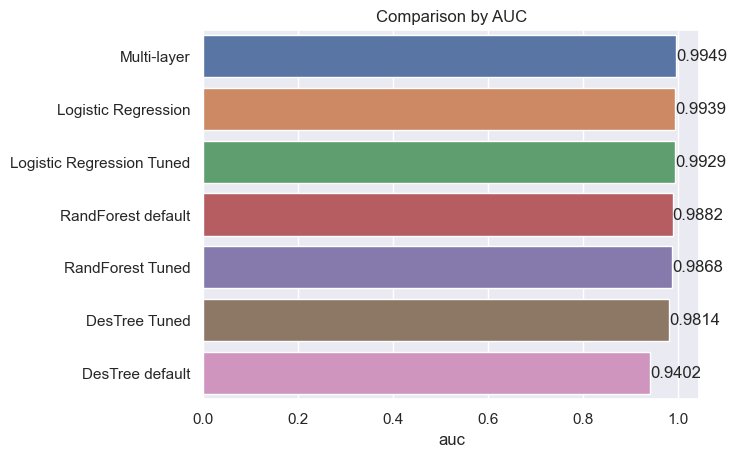

In [93]:
g=sns.barplot(data=report.sort_values('auc',ascending=False),
 y=report.sort_values('auc',ascending=False).index,
 x='auc')
g.set(title='Comparison by AUC')
for i in g.containers:
 g.bar_label(i,fmt='%.4f')

With the highest **AUC** is the model **Multi-layer classifier**

### Balanced accuracy comparison

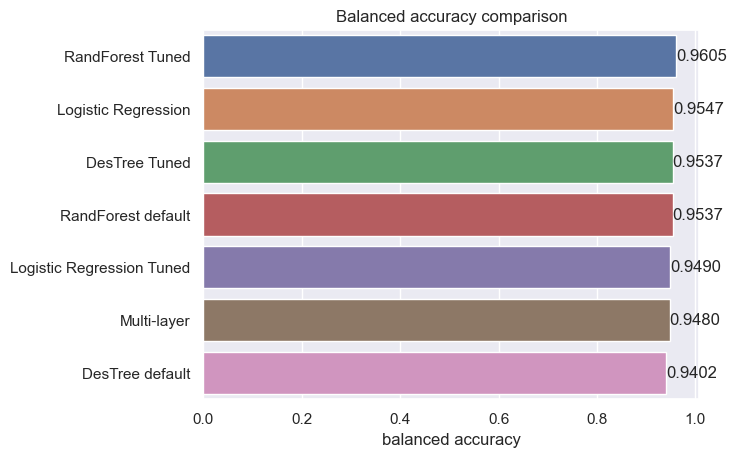

In [94]:
g=sns.barplot(data=report.sort_values('balanced accuracy',ascending=False),
 y=report.sort_values('balanced accuracy',ascending=False).index,
 x='balanced accuracy')
g.set(title='Balanced accuracy comparison')
for i in g.containers:
 g.bar_label(i,fmt='%.4f')

With the highest balanced accuracy is the **Random Forest** model with optimal hyper-parameter values

### Comparison by sensitivity

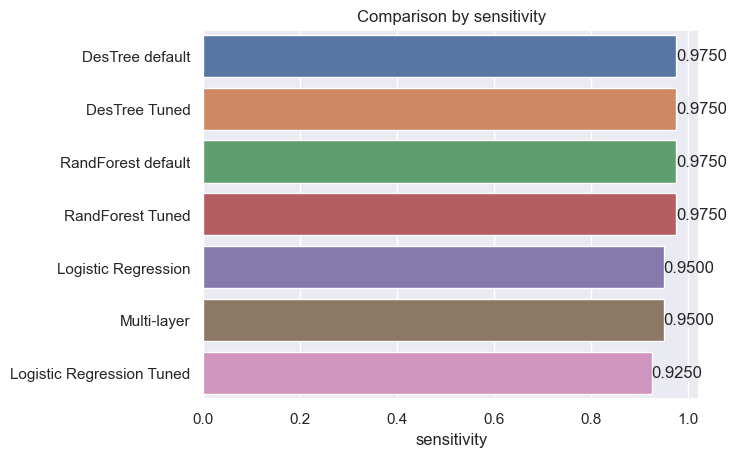

In [95]:
g=sns.barplot(data=report.sort_values('sensitivity',ascending=False),
 y=report.sort_values('sensitivity',ascending=False).index,
 x='sensitivity')
g.set(title='Comparison by sensitivity')
for i in g.containers:
 g.bar_label(i,fmt='%.4f')

The **Default Decision Tree** model with default parameters has the highest sensitivity

### Comparison by specificity

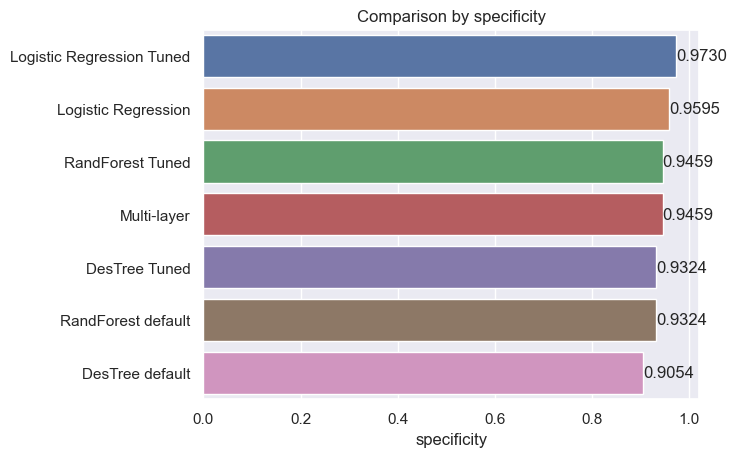

In [96]:
g=sns.barplot(data=report.sort_values('specificity',ascending=False),
 y=report.sort_values('specificity',ascending=False).index,
 x='specificity')
g.set(title='Comparison by specificity')
for i in g.containers:
 g.bar_label(i,fmt='%.4f')

With the highest specificity is the **Logistic Regression** model with optimal hyper-parameter values

##### From the comparison of different performance metrics, we can conclude that all models are able to classify cancer almost correctly.

# Interpreting the patterns

In [97]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

#### Precision Recall Curve за Random Forest Tuned

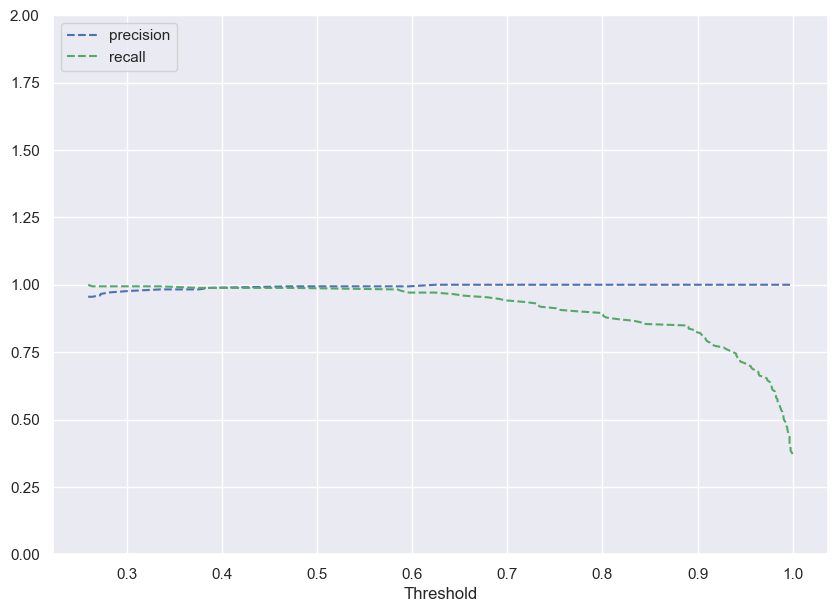

In [98]:
y_scores_rf2 = rf2.predict_proba(X_train) # predict_proba дава вероятността всяко наблюдение да принадлежи към всеки клас


precisions_rf2, recalls_rf2, thresholds_rf2 = precision_recall_curve(y_train, y_scores_rf2[:, 1])

plt.figure(figsize = (10, 7))
plt.plot(thresholds_rf2, precisions_rf2[:-1], 'b--', label = 'precision')
plt.plot(thresholds_rf2, recalls_rf2[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc = 'upper left')
plt.ylim([0, 2])
plt.show()

### Logistic regression coefficients

In [99]:
cols = X.columns

coef_lg = log_model.coef_

pd.DataFrame(coef_lg,columns = cols).T.sort_values(by = 0, ascending = False)

,0
radius_se,1.340124
texture_worst,1.137869
concavity_worst,1.108140
symmetry_worst,1.003142
radius_worst,0.964078
smoothness_worst,0.934225
area_worst,0.932840
area_se,0.913112
concavity_mean,0.799974
perimeter_se,0.789979


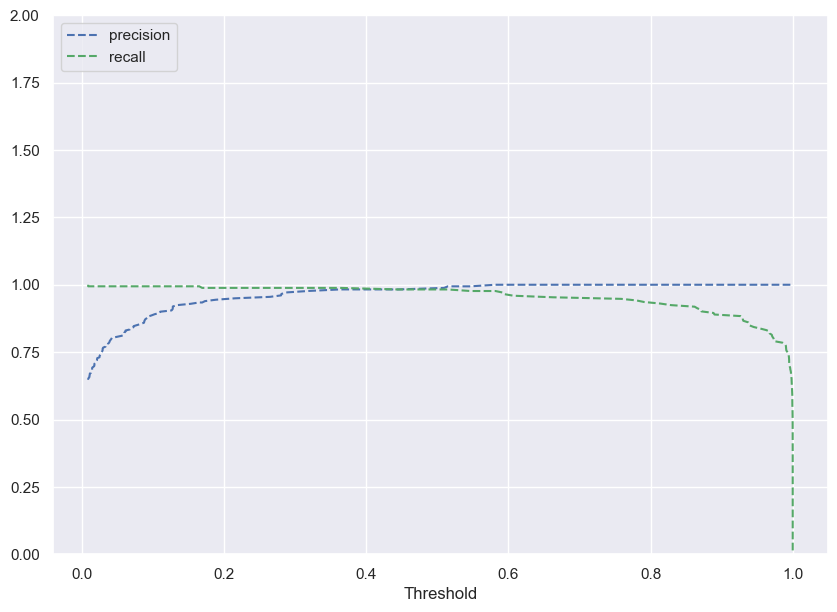

In [100]:
y_scores_lg = log_model.predict_proba(X_train) # predict_proba gives the probability that each observation belongs to each class

precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:, 1])

plt.figure(figsize = (10, 7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label = 'precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc = 'upper left')
plt.ylim([0, 2])
plt.show()

### We select the model with optimized parameter values

In [101]:
best=rf2.best_estimator_

### We calculate relative importance of the factor variables

In [102]:
X_test_col = pd.DataFrame(X_test, columns=X.columns)
features = pd.DataFrame(data={'feature': list(X.columns), 'importance': list(best.feature_importances_)})
features.sort_values('importance', ascending=False, inplace=True)
features

,feature,importance
24,area_worst,0.131194
8,concave points_mean,0.115339
21,radius_worst,0.103098
28,concave points_worst,0.100765
23,perimeter_worst,0.093627
14,area_se,0.070677
27,concavity_worst,0.060765
4,area_mean,0.057939
3,perimeter_mean,0.054588
1,radius_mean,0.048627


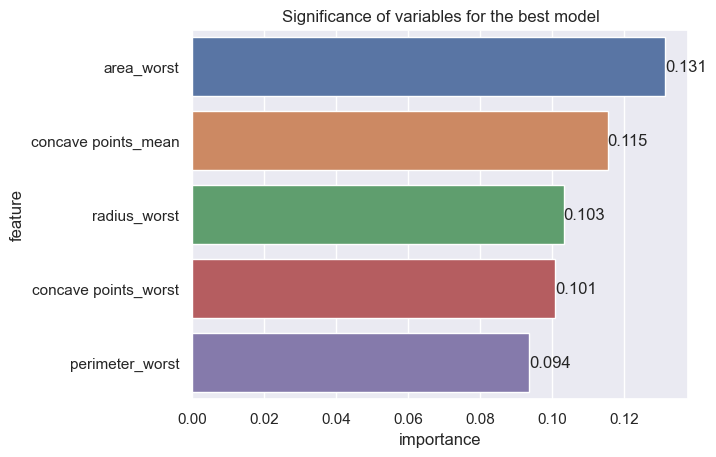

In [103]:
g=sns.barplot(x='importance',y='feature',data=features[:5])
for i in g.containers:
 g.bar_label(i,fmt='%.3f')
g.set_title('Significance of variables for the best model')
plt.show()

According to the analysis of the relative importance of the factor variables in the database, we can conclude that these 5 factors are of the greatest importance for the classification.

## SHAP summary plot

In [104]:
import shap
shap.initjs()

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


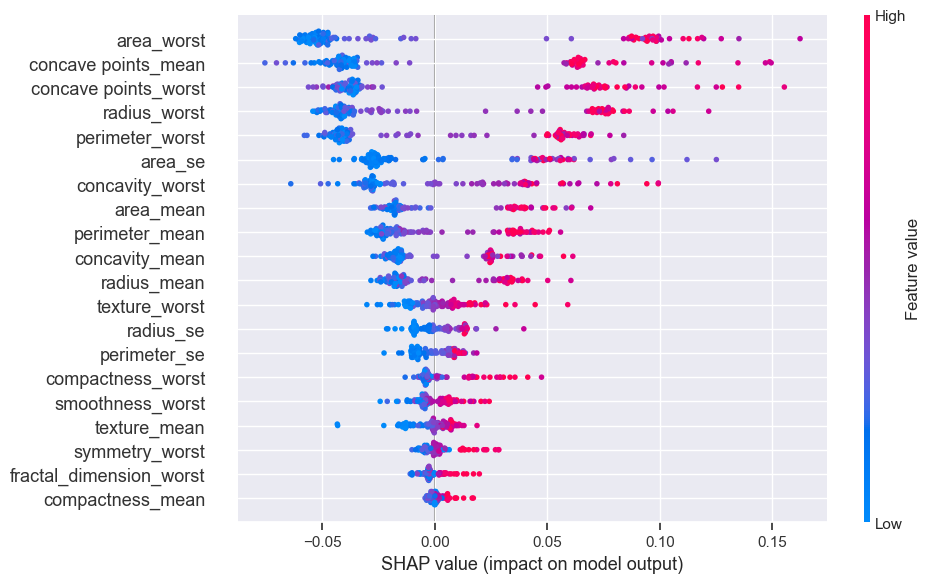

In [105]:
explainer = shap.TreeExplainer(best)
shap_obj = explainer(X_test)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values=np.take(shap_obj.values, 1, axis=-1),
                   features=pd.DataFrame(X_test, columns=X.columns),
                   feature_names=list(X.columns),
                   plot_size=(10, 6))